###### <img src="./logo_UTN.svg" align="right" width="150" /> 

### Procesamiento Digital de Señales

## Trabajo Práctico Nº10: Procesamiento no lineal de ECG (2da parte).

### Gabriel Cruz

## Enunciado

#### Realizar el punto 5 del TP4.

5 ) Utilice las siguientes metodologías no lineales de estimación-substracción para la remoción de la interferencia de línea de base, y compare con las técnicas lineales del punto anterior en las mismas regiones. Luego discuta las ventajas y desventajas de cada técnica.

a) Estimación del movimiento de línea de base a partir del filtrado de mediana. A partir de la siguiente estimación del movimiento de línea de base

\begin{equation}
\hat{b} = med_{600} (med_{200} (s))
\end{equation}

Donde s representa la señal de ECG a partir de la que estimamos el movimiento de la línea de base b^. El operador med200 calcula muestra a muestra la mediana en los 200 ms previos a la muestra actual. Luego dicha estimación la substraemos para estimar la actividad eléctrica cardíaca x^

\begin{equation}
\hat{x} = s - \hat{b}
\end{equation}

##### Ayuda: Puede utilizar la implementación del filtro de mediana provista en scipy.signal

b) Estimación del movimiento de línea de base a partir de los segmentos isoeléctricos de cada latido. A partir de las detecciones provistas, puede estimar aproximadamente el nivel isoeléctrico, es decir el momento donde la actividad eléctrica cardíaca es nula. El intervalo entre la onda P y Q, es un buen momento para estimar las características de las señales interferentes que originan el movimiento de la línea de base.

Para la localización del segmento PQ puede valerse de la localización de cada latido (líneas rojas verticales) y a partir de la misma, anticipar un tiempo adecuado de manera tal de no incluir la onda P ni Q. Puede ayudarse con el latido promedio de un latido normal para establecer dicho intervalo.

Recuerde que la señal de línea de base debe estar muestreada a la misma frecuencia que el ECG, por lo que debería remuestrear dicha señal (puede usar la función de interpolación spline para ello).

##### Ayuda: Puede utilizar la función de interpolación spline scipy.interpolate.CubicSpline


## a) Estimación del movimiento de línea de base a partir del filtrado de mediana

In [6]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(r'C:\Users\gabri\AppData\Roaming\Python\Python312\site-packages')

# Módulos importantantes

import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as sio
from scipy.io.wavfile import write

from scipy import signal
from scipy.fft import fft, fftshift
from scipy.interpolate import CubicSpline
from pytc2.sistemas_lineales import plot_plantilla

import matplotlib.ticker

def vertical_flaten(a):

    return a.reshape(a.shape[0],1)

In [7]:
###
## Señal de ECG registrada a 1 kHz, con contaminación de diversos orígenes.
###

fs = 1000 # Hz
nyq_frec = fs / 2

mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)


ecg_interes = ecg_one_lead[4000:5500] #10 segundo de la señal ECG
N = len(ecg_interes)

ecg_interes_2 = ecg_one_lead[10000:11000]
N_2 = len(ecg_interes_2)

ecg_interes_3 = ecg_one_lead[730000:733000]
N_3 = len(ecg_interes_3)

ecg_interes_4 = ecg_one_lead[900000:903000]

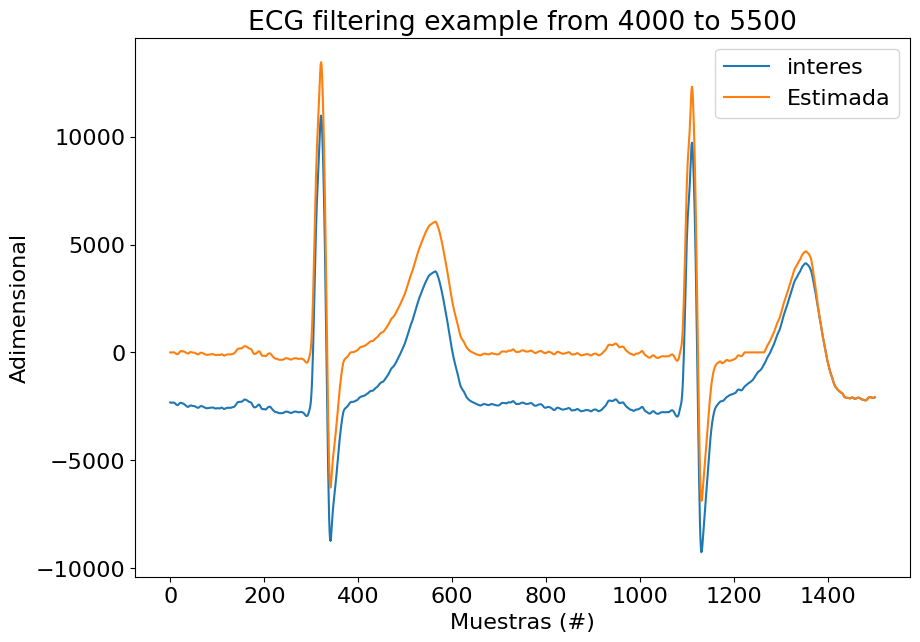

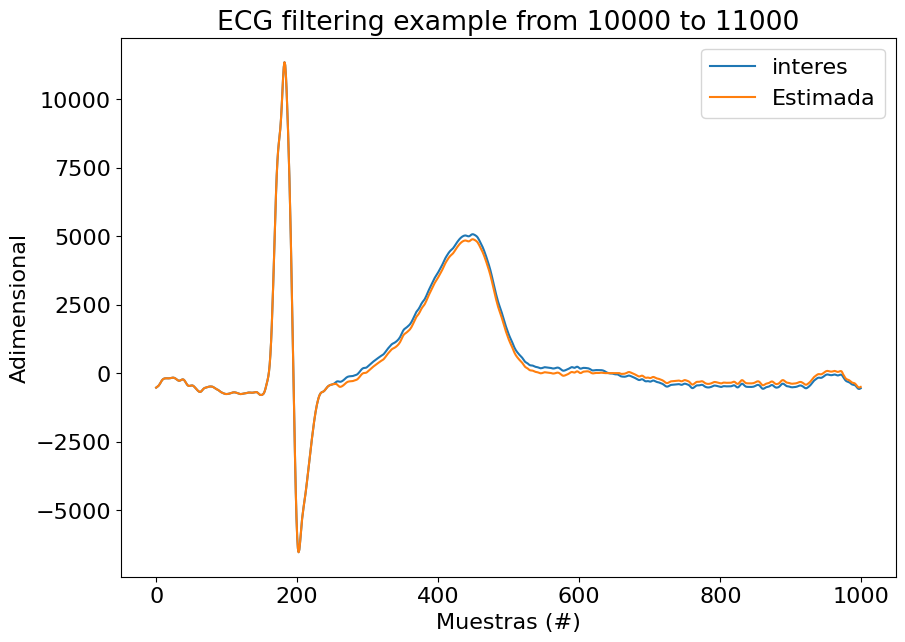

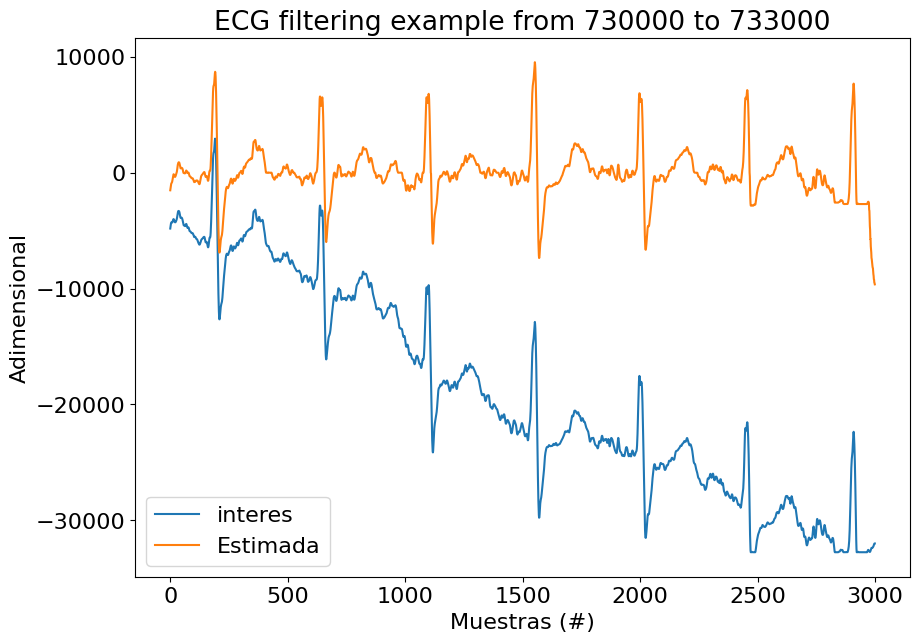

In [8]:
#%%a) Estimación del movimiento de línea de base a partir del filtrado de mediana
kernel_1 = 199
kernel_2 = 599


est_1 = sig.medfilt(ecg_interes, kernel_1)

est_2 = sig.medfilt(est_1, kernel_2)

AEC = ecg_interes - est_2

plt.figure()
plt.plot(ecg_interes, label = 'interes')
plt.plot(AEC, label='Estimada')
plt.title('ECG filtering example from 4000 to 5500')
plt.ylabel('Adimensional')
plt.xlabel('Muestras (#)')
plt.legend()
plt.show()

est_1 = sig.medfilt(ecg_interes_2, kernel_1)

est_2 = sig.medfilt(est_1, kernel_2)

AEC = ecg_interes_2 - est_2

plt.figure()
plt.plot(ecg_interes_2, label = 'interes')
plt.plot(AEC, label='Estimada')
plt.title('ECG filtering example from 10000 to 11000')
plt.ylabel('Adimensional')
plt.xlabel('Muestras (#)')
plt.legend()
plt.show()
    

est_1 = sig.medfilt(ecg_interes_3, kernel_1)

est_2 = sig.medfilt(est_1, kernel_2)

AEC = ecg_interes_3 - est_2

plt.figure()
plt.plot(ecg_interes_3, label = 'interes')
plt.plot(AEC, label='Estimada')
plt.title('ECG filtering example from 730000 to 733000')
plt.ylabel('Adimensional')
plt.xlabel('Muestras (#)')
plt.legend()
plt.show()

En el grafico de arriba se puede observar el metodo de filtrado de mediana. Este metodo no lineal es mucho mejor para eliminar las interferencias en el segmento entre P y Q, comparandolo con los filtro lineales que no eran eficientes para eliminar estas interferencias y generaban oscilaciones cambiando la morfologia de la señal, una desventaja que tiene este metodo es que requiere de un mayor procesamiento computacional ya que esta realizando la mediana en segmentos y si la señal es muy grande puede demandar mayor procesamiento.

## Filtrado por Interpolacion con CubicSpline

In [9]:
#%% b) Estimación del movimiento de línea de base a partir de los segmentos isoeléctricos de cada latido. 

ventana = 600
R_i_inf = 250
R_i_sup = 350

ecg_one_lead = np.ravel(ecg_one_lead)
qrs_detecion = mat_struct['qrs_detections']
N_det = len(qrs_detecion)

matriz_ecg_ventanas = np.zeros((ventana,N_det))

for i in range(N_det):
    matriz_ecg_ventanas[:,i] = ecg_one_lead[int(qrs_detecion[i]-R_i_inf) : int(qrs_detecion[i] + R_i_sup)]
    matriz_ecg_ventanas[:,i] = matriz_ecg_ventanas[:,i] - np.mean(matriz_ecg_ventanas[:,i])
   
    
Num_latido_interes = 0  # Los busque en el explorador de variables para que conincida con la señal de 900000 a 903000
Num_latido_interes_2 = N_det
Num_latidos = Num_latido_interes_2 - Num_latido_interes

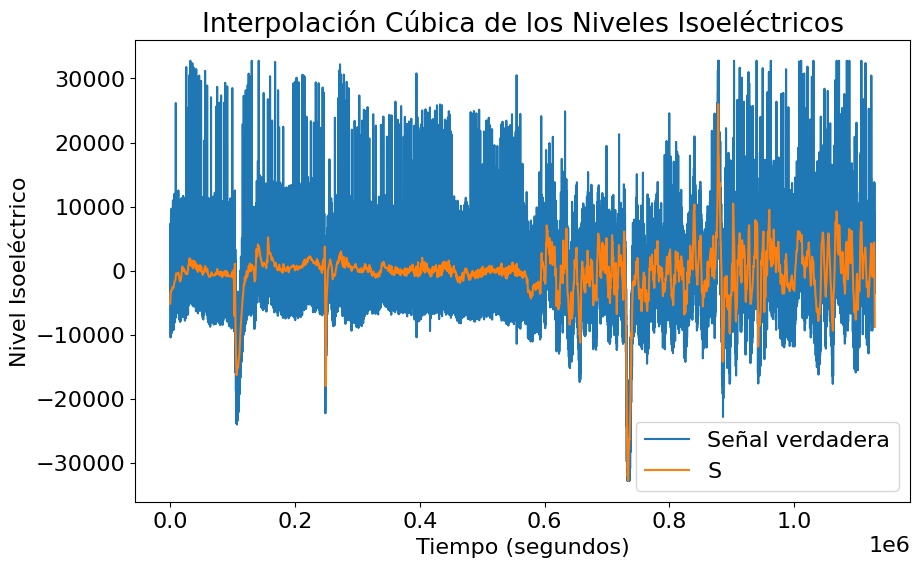

In [10]:
intervalo_PQ_ms = 100

Valor_x = (np.round(qrs_detecion - intervalo_PQ_ms)).astype(int)

y = ecg_one_lead
cs = CubicSpline(Valor_x.flatten(), y[Valor_x])

xs = np.arange(0,cant_muestras)

# Graficar el resultado
plt.figure(figsize=(10, 6))
plt.plot(xs, y, label='Señal verdadera')
plt.plot(xs, cs(xs), label="S")
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Nivel Isoeléctrico')
plt.legend()
plt.title('Interpolación Cúbica de los Niveles Isoeléctricos')
plt.show()


En el grafico de arriba se puede observar la interpolacion de los puntos ubicados 100ms antes del pico QRS en toda la señal.

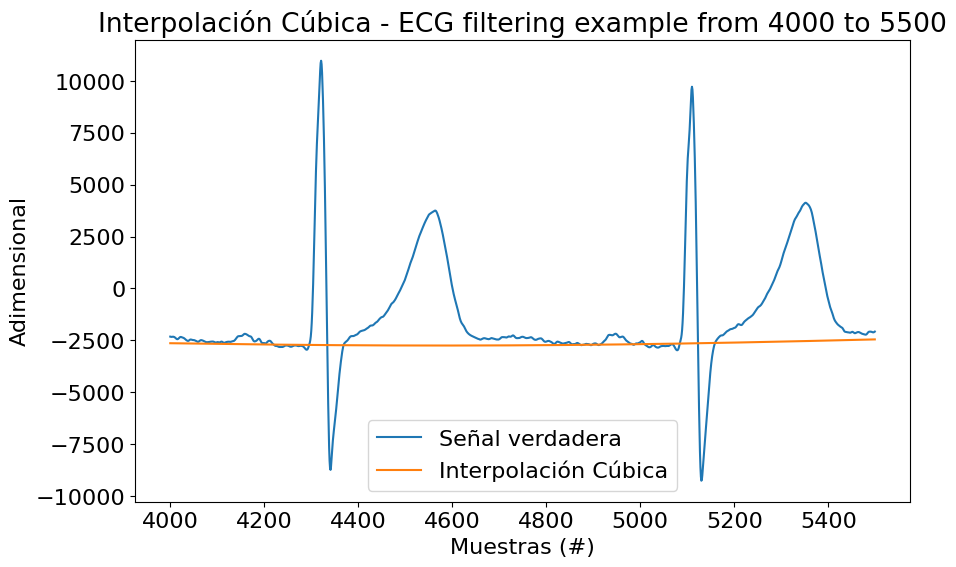

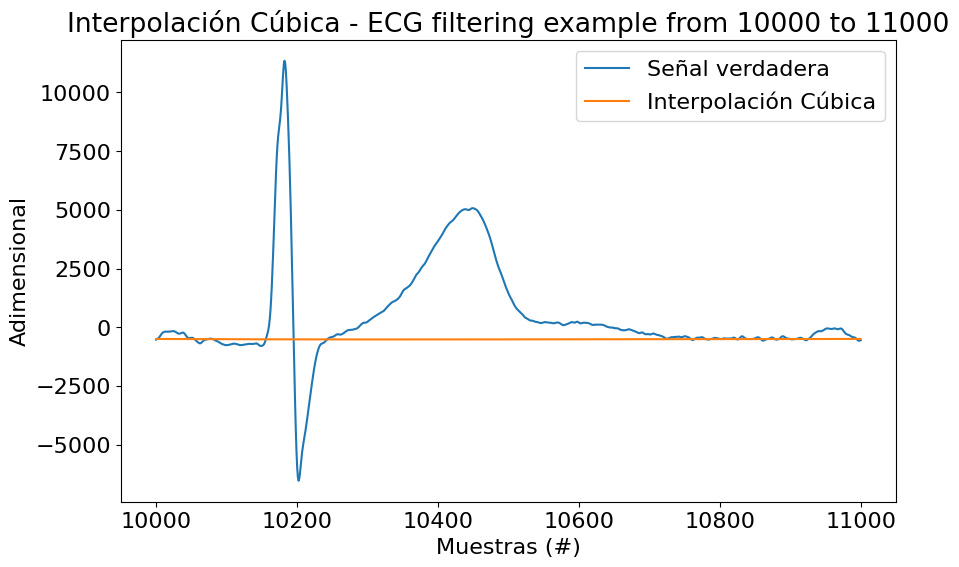

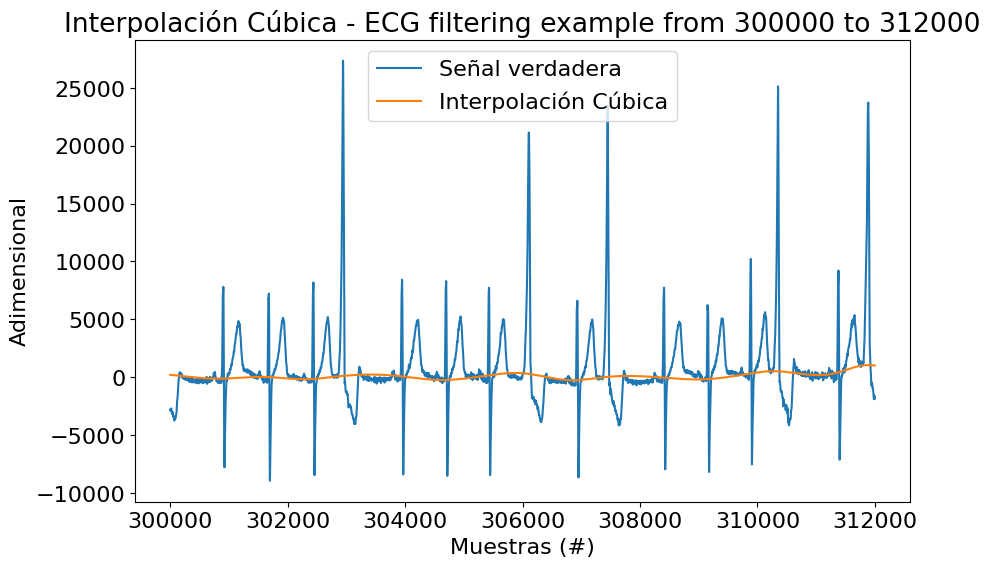

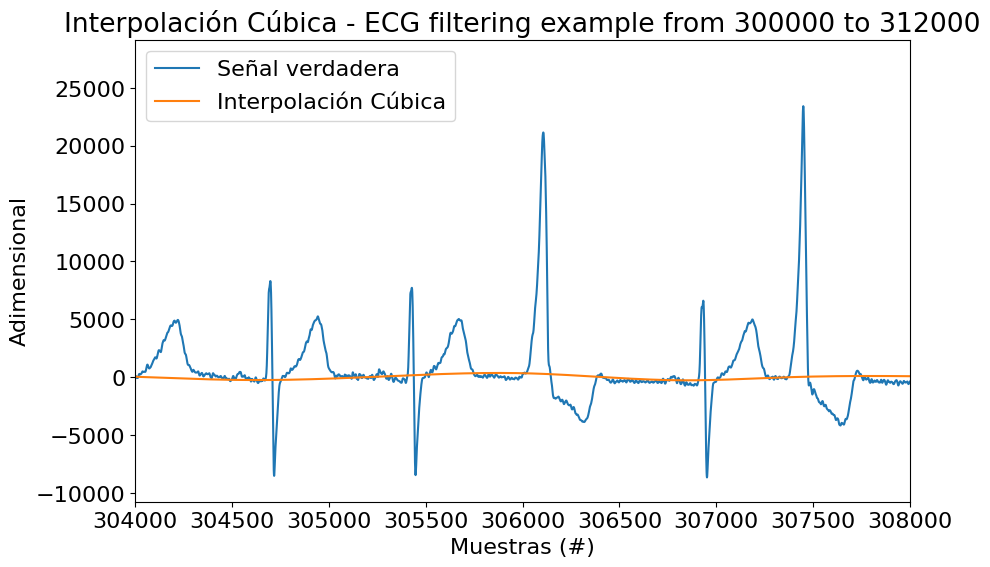

In [11]:

t_inicio = 4000   
t_fin = 5500      

# Crear el rango que quieres mostrar (desde t_inicio hasta t_fin)
xs_parcial = xs[t_inicio:t_fin]
y_parcial = y[t_inicio:t_fin]
cs_parcial = cs(xs_parcial)

plt.figure(figsize=(10, 6))
plt.plot(xs_parcial, y_parcial, label='Señal verdadera')
plt.plot(xs_parcial, cs_parcial, label="Interpolación Cúbica")
plt.ylabel('Adimensional')
plt.xlabel('Muestras (#)')
plt.legend()
plt.title('Interpolación Cúbica - ECG filtering example from 4000 to 5500' )
plt.show()

t_inicio = 10000  
t_fin = 11000       

# Crear el rango que quieres mostrar (desde t_inicio hasta t_fin)
xs_parcial = xs[t_inicio:t_fin]
y_parcial = y[t_inicio:t_fin]
cs_parcial = cs(xs_parcial)

plt.figure(figsize=(10, 6))
plt.plot(xs_parcial, y_parcial, label='Señal verdadera')
plt.plot(xs_parcial, cs_parcial, label="Interpolación Cúbica")
plt.ylabel('Adimensional')
plt.xlabel('Muestras (#)')
plt.legend()
plt.title('Interpolación Cúbica - ECG filtering example from 10000 to 11000' )
plt.show()

t_inicio = 300000
t_fin = 312000

# Crear el rango que quieres mostrar (desde t_inicio hasta t_fin)
xs_parcial = xs[t_inicio:t_fin]
y_parcial = y[t_inicio:t_fin]
cs_parcial = cs(xs_parcial)

plt.figure(figsize=(10, 6))
plt.plot(xs_parcial, y_parcial, label='Señal verdadera')
plt.plot(xs_parcial, cs_parcial, label="Interpolación Cúbica")
plt.ylabel('Adimensional')
plt.xlabel('Muestras (#)')
plt.legend()
plt.title('Interpolación Cúbica - ECG filtering example from 300000 to 312000' )
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(xs_parcial, y_parcial, label='Señal verdadera')
plt.plot(xs_parcial, cs_parcial, label="Interpolación Cúbica")
plt.ylabel('Adimensional')
plt.xlabel('Muestras (#)')
plt.xlim(304000,308000)
plt.legend()
plt.title('Interpolación Cúbica - ECG filtering example from 300000 to 312000' )
plt.show()

En los graficos de arriba se puede observar que en las parte de la señal donde hay una mayor variacion de las lineas de base (Segmento PQ) la interporlacion tiene un mejor seguimiento.

# Comparacion de todos los metodos utilizados

En esta ultima parte vamos a realizar una comparacion de los filtros lineales y no lineales visto en la cursada.

Los filtros lineales y no lineales utilizados fueron los siguientes:

- Filtro FIR (Lineal)
- Filtro IIR (Lineal)
- Filtro por mediana (No Lineal)
- Interpolacion (No Lineal)


### Analisis en zonas de alta contaminacion

In [12]:
fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})


# filter design
ripple = 0 # dB
atenuacion = 40 # dB

ws1 = 0.1 #Hz
wp1 = 0.5 #Hz
wp2 = 30 #Hz
ws2 = 45 #Hz

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec
gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)

In [13]:
#%% Filtro Remez

den = 1.0

cutoff = 30.0    # Desired cutoff frequency, Hz
trans_width = 0.4  # Width of transition from pass to stop, Hz
numtaps = 4901      # Size of the FIR filter.

edges = [0, cutoff, cutoff + trans_width, nyq_frec]  # Definir las bandas

# Ganancias deseadas: paso (1) hasta la frecuencia de corte y rechazo (0) después de la transición
desired = [1, 0]  # Paso (1) en la banda de paso, Rechazo (0) en la banda de atenuación

taps1 = sig.remez(numtaps, edges, desired, fs=fs)

cutoff = 0.5    # Desired cutoff frequency, Hz
trans_width = 0.4  # Width of transition from pass to stop, Hz
numtaps = 5451      # Size of the FIR filter.

edges = [0,cutoff - trans_width, cutoff, nyq_frec]  # Definir las bandas

# Ganancias deseadas: paso (1) hasta la frecuencia de corte y rechazo (0) después de la transición
desired = [0, 1]  # Paso (1) en la banda de paso, Rechazo (0) en la banda de atenuación

taps2 = sig.remez(numtaps, edges, desired, fs=fs)

num_win = np.convolve(taps1, taps2)
w, hh_win = sig.freqz(num_win, [1], worN=2000, fs=fs)

#%% Diseño de Filtro IIR

ripple_IIR= 1
ws = [frecs[1], frecs[4]]
wp = [frecs[2], frecs[3]]

bp_sos_butter = sig.iirdesign(wp,ws, ripple_IIR, atenuacion, ftype='butter', output = 'sos')

# Muestra de frecuencias para calcular la respuesta en frecuencia
w2  = np.append(np.logspace(-1, 0.8, 250), np.logspace(0.9, 1.8, 250))
w2  = np.append(w2, np.linspace(110, nyq_frec, 100, endpoint=True)) / nyq_frec * np.pi

# Respuesta en frecuencia usando sosfreqz
w2, h = sig.sosfreqz(bp_sos_butter, worN=w2)

# Renormalizar el eje de frecuencia
w2 = w2 / np.pi * nyq_frec

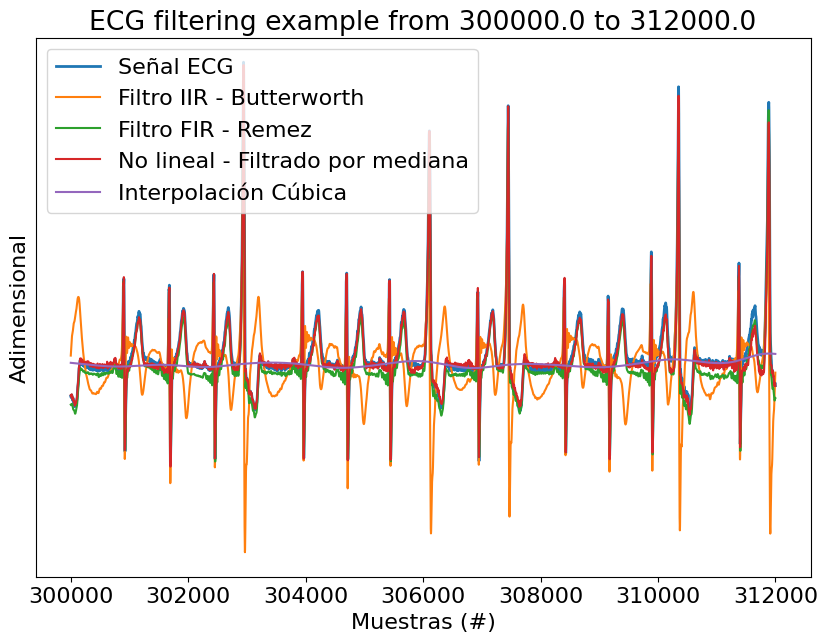

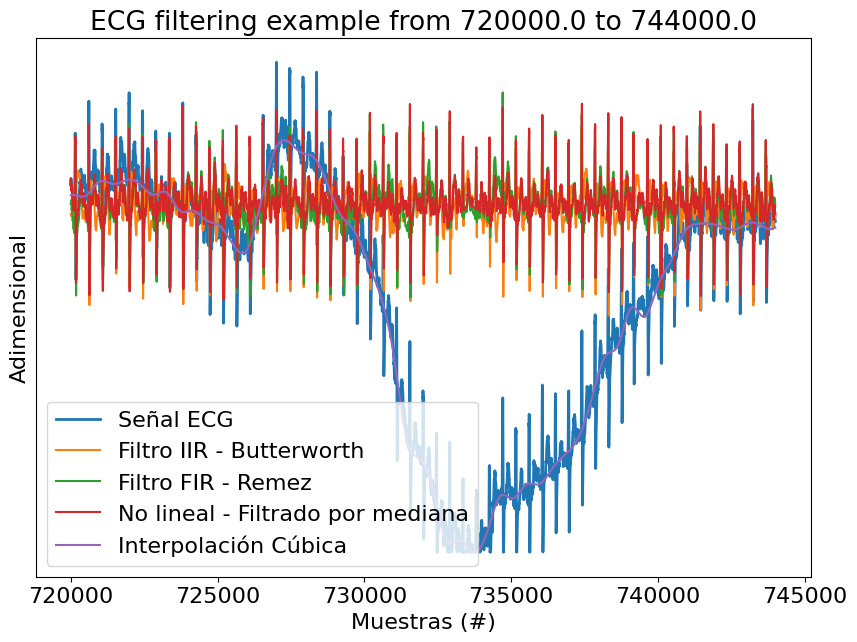

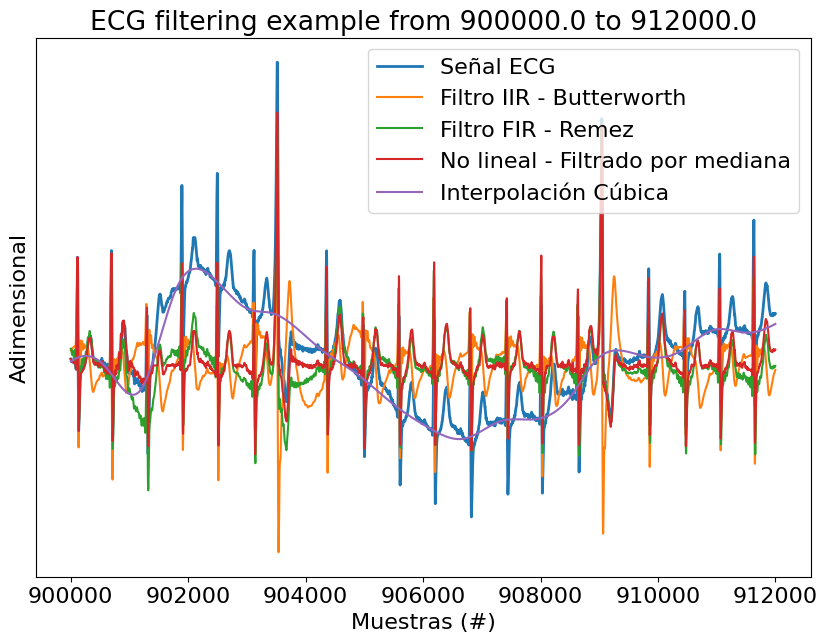

In [14]:
cant_coeficientes = (5451 + 4901)//2
# FIR
ECG_f_win = sig.lfilter(num_win, den, ecg_one_lead)
#IIR
ECG_f_butt = sig.sosfilt(bp_sos_butter, ecg_one_lead)
#interpolacion
y = ecg_one_lead
cs = CubicSpline(Valor_x.flatten(), y[Valor_x])
xs = np.arange(0,cant_muestras)

# demora = (cant_coeficientes - 1) // 2

demora = cant_coeficientes 

# Segmentos de interés con ALTA contaminación

regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    xs_parcial = xs[zoom_region]
    y_parcial = y[zoom_region]
    cs_parcial = cs(xs_parcial)
    
    est_1 = sig.medfilt(ecg_one_lead[zoom_region], kernel_1)
    est_2 = sig.medfilt(est_1, kernel_2)
    AEC = ecg_one_lead[zoom_region] - est_2
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='Señal ECG', linewidth=2)
    plt.plot(zoom_region, ECG_f_butt[zoom_region + 50], label='Filtro IIR - Butterworth')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Filtro FIR - Remez')
    plt.plot(zoom_region,AEC, label='No lineal - Filtrado por mediana')
    plt.plot(xs_parcial, cs_parcial, label="Interpolación Cúbica")
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

En los graficos de arriba se puede observar las zonas de **alta contaminacion** en donde vamos a realizar la comparacion de todos los filtros utilizados. Vemos que todos los filtros corrigen el desplazamiento de la señal ECG y se ve que son eficientes para el filtrado en alta frecuencia.

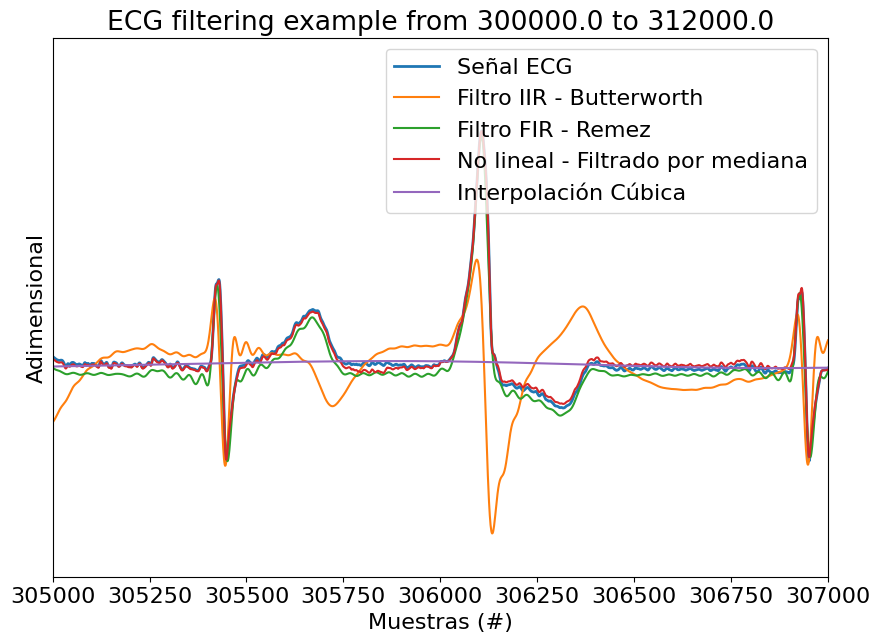

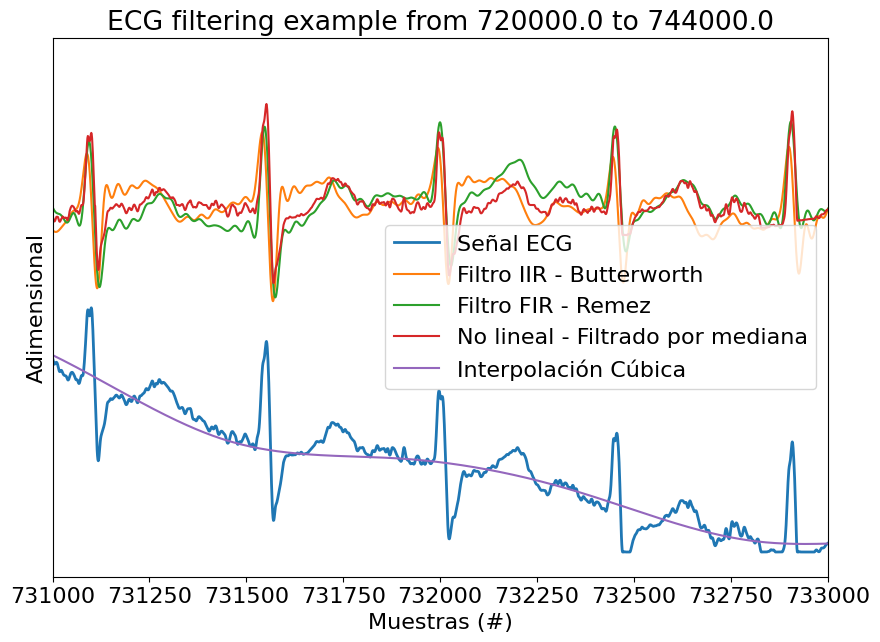

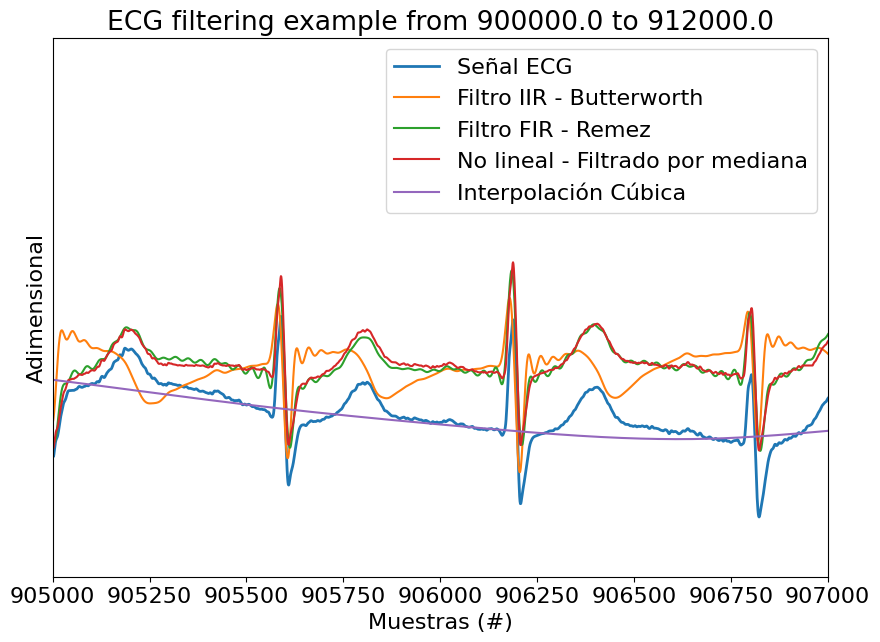

In [18]:

n_muestras_max = 2000  # Número máximo de muestras a mostrar

for ii in regs_interes:
    
    # Obtener el rango de tiempo en muestras para el segmento de interés
    inicio = np.max([0, ii[0]])  # Evitar que se pase de cero
    fin = np.min([cant_muestras, ii[1]])  # Evitar que se pase del número total de muestras

    # Calcular el rango de muestras centrado en el intervalo de interés
    centro = (inicio + fin) // 2  # Encuentra el punto medio del intervalo de interés
    half_window = n_muestras_max // 2  # Mitad de la ventana de 1000 muestras

    # Asegúrate de que la ventana no se salga de los límites de la señal
    zoom_inicio = np.max([0, centro - half_window])
    zoom_fin = np.min([cant_muestras, centro + half_window])

    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    xs_parcial = xs[zoom_region]
    y_parcial = y[zoom_region]
    cs_parcial = cs(xs_parcial)
    
    est_1 = sig.medfilt(ecg_one_lead[zoom_region], kernel_1)
    est_2 = sig.medfilt(est_1, kernel_2)
    AEC = ecg_one_lead[zoom_region] - est_2
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='Señal ECG', linewidth=2)
    plt.plot(zoom_region, ECG_f_butt[zoom_region + 50], label='Filtro IIR - Butterworth')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Filtro FIR - Remez')
    plt.plot(zoom_region,AEC, label='No lineal - Filtrado por mediana')
    plt.plot(xs_parcial, cs_parcial, label="Interpolación Cúbica")
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    # Ajusta los límites de x para mostrar siempre 1000 muestras
    plt.xlim([zoom_inicio, zoom_fin])
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

En los graficos de arriba se realizo un zoom en la parte central de las señales anteriores para observar mejor el comportamiento de los filtros utilizados y se pueden observar que tanto los filtros linealos como no lineales son eficientes para filtrar la alta frecuencia.

### Analisis en zonas de baja contaminacion

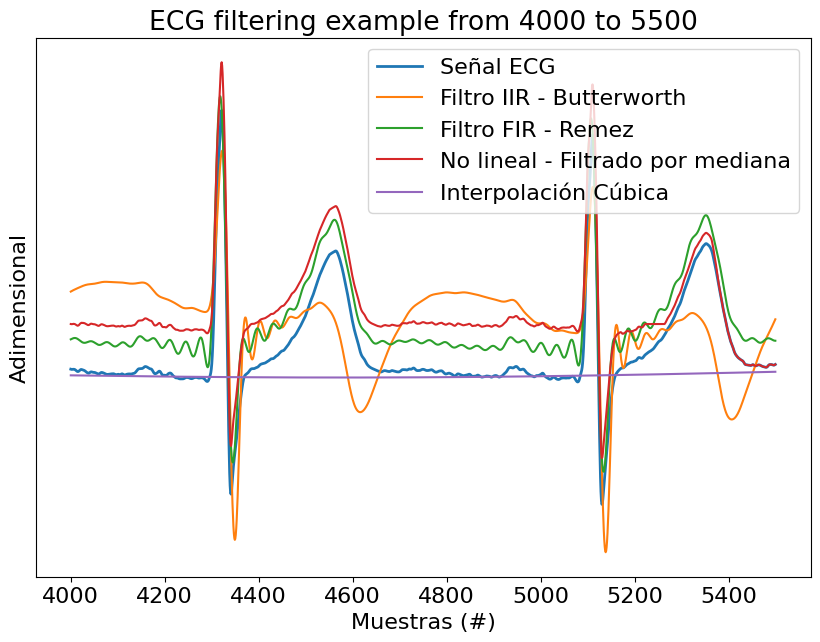

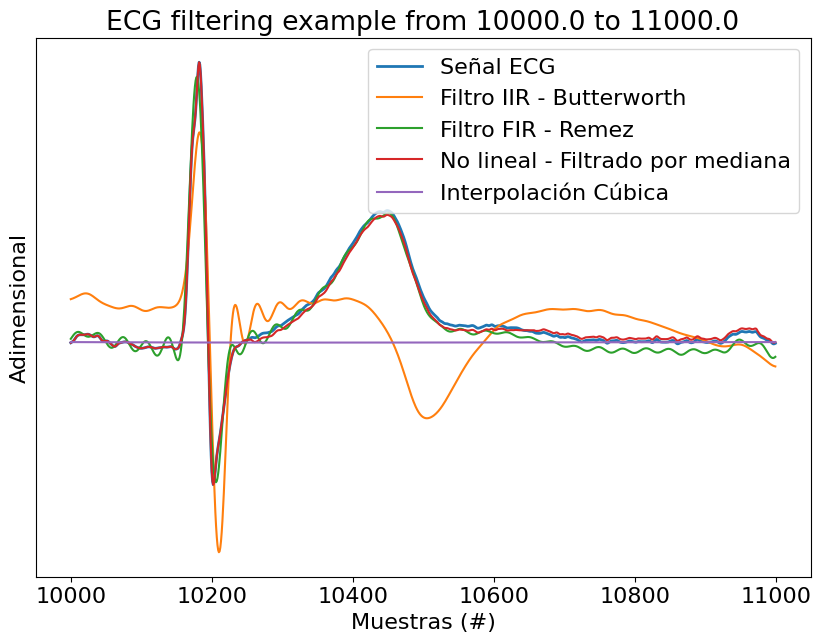

In [15]:
#%% Analisis de contaminación de baja frecuencia
    
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
   
    xs_parcial = xs[zoom_region]
    y_parcial = y[zoom_region]
    cs_parcial = cs(xs_parcial)
    
    est_1 = sig.medfilt(ecg_one_lead[zoom_region], kernel_1)
    est_2 = sig.medfilt(est_1, kernel_2)
    AEC = ecg_one_lead[zoom_region] - est_2
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='Señal ECG', linewidth=2)
    plt.plot(zoom_region, ECG_f_butt[zoom_region + 40], label='Filtro IIR - Butterworth')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Filtro FIR - Remez')
    plt.plot(zoom_region,AEC, label='No lineal - Filtrado por mediana')
    plt.plot(xs_parcial, cs_parcial, label="Interpolación Cúbica")
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

En los graficos de arriba se puede observar el comportamiento de los distintos filtros en las zonas de **baja contaminacion**. Los filtros lineales generan las oscilaciones que vimos en el TS9 en comparacion con los filtros no lineales que siguen mejor la señal ECG sin producir esas oscilaciones que modificaban la morfologia de la señal.